In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("marwant1/online-retail-2")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/marwant1/online-retail-2/versions/1


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
sns.set()
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings("ignore")

# **Explore Data**

In [ ]:
dataset_file_path = f"{path}/online_retail_II.xlsx"
df = pd.read_excel(dataset_file_path)

# Preview the DataFrame
print("Path to dataset files:", path)
print("First few rows of the dataset:")
print(df.head())

Path to dataset files: /root/.cache/kagglehub/datasets/marwant1/online-retail-2/versions/1
First few rows of the dataset:
  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom  


In [ ]:
df.sample(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
127212,501539,47566B,TEA TIME PARTY BUNTING,1,2010-03-17 14:05:00,4.65,13275.0,United Kingdom
78575,496519,22198,"POPCORN HOLDER , LARGE",12,2010-02-02 12:03:00,1.65,17581.0,United Kingdom
377854,525870,21126,SET OF 6 GIRLS CELEBRATION CANDLES,12,2010-10-07 13:38:00,1.25,15641.0,United Kingdom
80348,496745,20724,RED SPOTTY CHARLOTTE BAG,10,2010-02-03 14:36:00,0.85,16722.0,United Kingdom
511312,537135,22834,HAND WARMER BABUSHKA DESIGN,2,2010-12-05 12:35:00,2.10,17059.0,United Kingdom
1357,C489563,90085,CRYSTAL STILETTO PHONE CHARM,-81,2009-12-01 13:09:00,0.85,13526.0,United Kingdom
387197,526647,21106,CREAM SLICE FLANNEL CHOCOLATE SPOT,1,2010-10-12 13:39:00,2.95,12748.0,United Kingdom
23879,491321,21210,SET OF 72 RETRO SPOT PAPER DOILIES,10,2009-12-10 15:36:00,1.45,17032.0,United Kingdom
58253,494644,21438,TUB 24 HANGING EASTER EGGS SPOTTY,1,2010-01-17 12:12:00,3.75,16595.0,United Kingdom
380439,526028,21558,SKULL LUNCH BOX WITH CUTLERY,1,2010-10-08 11:45:00,2.55,16549.0,United Kingdom


In [ ]:
df.shape

(525461, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [ ]:
df.isna().sum()

,0
Invoice,0
StockCode,0
Description,2928
Quantity,0
InvoiceDate,0
Price,0
Customer ID,107927
Country,0


In [ ]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,525461.000000,525461,525461.000000,417534.000000
mean,10.337667,2010-06-28 11:37:36.845017856,4.688834,15360.645478
min,-9600.000000,2009-12-01 07:45:00,-53594.360000,12346.000000
25%,1.000000,2010-03-21 12:20:00,1.250000,13983.000000
50%,3.000000,2010-07-06 09:51:00,2.100000,15311.000000
75%,10.000000,2010-10-15 12:45:00,4.210000,16799.000000
max,19152.000000,2010-12-09 20:01:00,25111.090000,18287.000000
std,107.424110,NaN,146.126914,1680.811316


In [ ]:
df["Invoice"].str.replace("[0-9]", "", regex=True).unique()

array([nan, 'C', 'A'], dtype=object)

In [ ]:
df["StockCode"] = df["StockCode"].astype("str")
df[(df["StockCode"].str.match("^\\d{5}$") == False) & (df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$") == False)]["StockCode"].unique()

array(['POST', 'D', 'DCGS0058', 'DCGS0068', 'DOT', 'M', 'DCGS0004',
       'DCGS0076', 'C2', 'BANK CHARGES', 'DCGS0003', 'TEST001',
       'gift_0001_80', 'DCGS0072', 'gift_0001_20', 'DCGS0044', 'TEST002',
       'gift_0001_10', 'gift_0001_50', 'DCGS0066N', 'gift_0001_30',
       'PADS', 'ADJUST', 'gift_0001_40', 'gift_0001_60', 'gift_0001_70',
       'gift_0001_90', 'DCGSSGIRL', 'DCGS0006', 'DCGS0016', 'DCGS0027',
       'DCGS0036', 'DCGS0039', 'DCGS0060', 'DCGS0056', 'DCGS0059', 'GIFT',
       'DCGSLBOY', 'm', 'DCGS0053', 'DCGS0062', 'DCGS0037', 'DCGSSBOY',
       'DCGSLGIRL', 'S', 'DCGS0069', 'DCGS0070', 'DCGS0075', 'B',
       'DCGS0041', 'ADJUST2', '47503J ', 'C3', 'SP1002', 'AMAZONFEE'],
      dtype=object)

# **DATA CLEANING PROCESS**

In [ ]:
clean_df = df.copy()

In [ ]:
clean_df['Invoice'] = clean_df['Invoice'].astype('str')
clean_df = clean_df[clean_df['Invoice'].str.match(r'^\d{6}$', na=False)]
clean_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [ ]:
clean_df['StockCode'] = clean_df['StockCode'].astype('str')
mask = (
    clean_df['StockCode'].str.match(r'^\d{5}$')
    | clean_df['StockCode'].str.match(r'^\d{5}[a-zA-Z]+$')
    | clean_df['StockCode'].str.match(r'^PADS$')

)

clean_df = clean_df[mask]
clean_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [ ]:
clean_df = clean_df.dropna(subset=['Customer ID'])

In [ ]:
clean_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,406337.000000,406337,406337.000000,406337.000000
mean,13.619099,2010-07-01 10:11:06.543288320,2.991462,15373.632992
min,1.000000,2009-12-01 07:45:00,0.000000,12346.000000
25%,2.000000,2010-03-26 14:01:00,1.250000,14004.000000
50%,5.000000,2010-07-09 15:48:00,1.950000,15326.000000
75%,12.000000,2010-10-14 17:09:00,3.750000,16814.000000
max,19152.000000,2010-12-09 20:01:00,295.000000,18287.000000
std,97.000659,NaN,4.285876,1677.365907


In [ ]:
clean_df.isna().sum()

,0
Invoice,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
Price,0
Customer ID,0
Country,0


In [ ]:
clean_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [ ]:
clean_df['Total_value'] = clean_df['Quantity'] * clean_df['Price']
clean_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total_value
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [ ]:
aggregated_df = clean_df.groupby(by='Customer ID').agg(
    Monetary_value = ('Total_value','sum'),
    Frequency = ('Invoice','nunique')
)
aggregated_df.head()

,Monetary_value,Frequency
Customer ID,,
12346.0,169.36,2
12347.0,1323.32,2
12348.0,221.16,1
12349.0,2221.14,2
12351.0,300.93,1


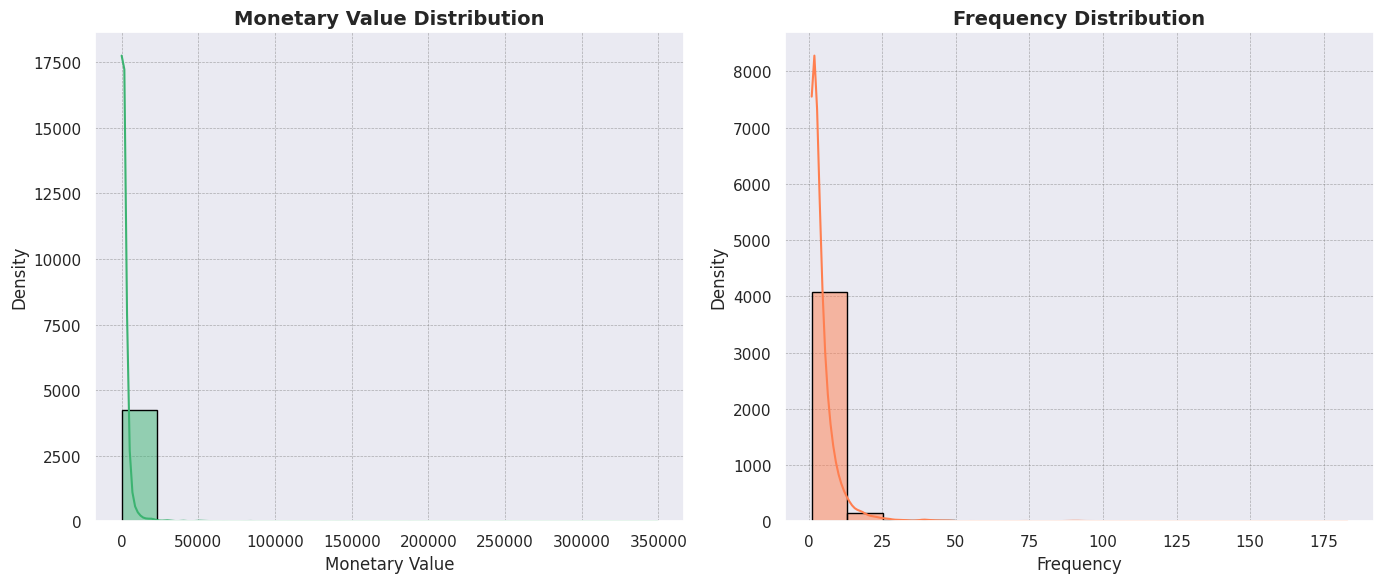

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the figure size for better visualization
plt.figure(figsize=(14, 6))

# Subplot 1: Monetary Value Distribution
plt.subplot(1, 2, 1)
sns.histplot(data=aggregated_df, x='Monetary_value', kde=True, color='mediumseagreen', bins=15, edgecolor='black')
plt.title('Monetary Value Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Monetary Value', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.6)

# Subplot 2: Frequency Distribution
plt.subplot(1, 2, 2)
sns.histplot(data=aggregated_df, x='Frequency', kde=True, color='coral', bins=15, edgecolor='black')
plt.title('Frequency Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.6)

# Adjust layout for better spacing and display
plt.tight_layout()

# Show the plots
plt.show()

In [ ]:
print(aggregated_df.shape)
print(aggregated_df.isnull().sum())  # Check for missing values


(4285, 2)
Monetary_value    0
Frequency         0
dtype: int64


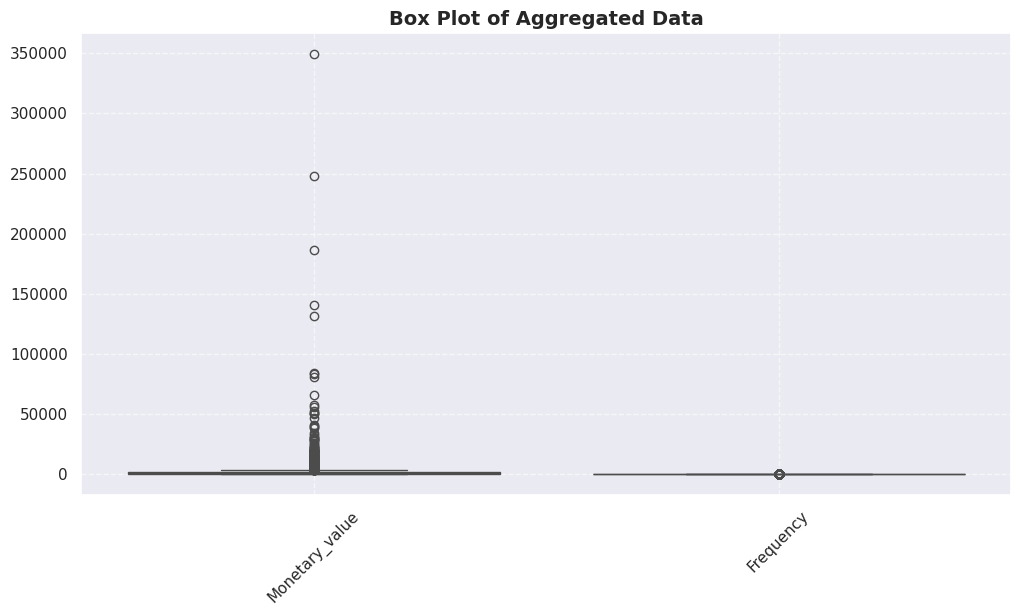

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(data=aggregated_df)
plt.title('Box Plot of Aggregated Data', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [ ]:
mon_Q1 = aggregated_df['Monetary_value'].quantile(.25)
mon_Q3 = aggregated_df['Monetary_value'].quantile(.75)
m_IQR = mon_Q3 - mon_Q1
F_Q1 = aggregated_df['Frequency'].quantile(.25)
F_Q3 = aggregated_df['Frequency'].quantile(.75)
F_IQR = F_Q3 - F_Q1
mask = (
    ((aggregated_df['Monetary_value'] < (mon_Q3 + 1.5 * m_IQR)) & (aggregated_df['Monetary_value'] > (mon_Q1 - 1.5 * m_IQR))) &
    ((aggregated_df['Frequency'] < (F_Q3 + 1.5 * F_IQR)) & (aggregated_df['Frequency'] > (F_Q1 - 1.5 * F_IQR)))
)
final_df = aggregated_df[mask].copy()
final_df

,Monetary_value,Frequency
Customer ID,,
12346.0,169.36,2
12347.0,1323.32,2
12348.0,221.16,1
12349.0,2221.14,2
12351.0,300.93,1
...,...,...
18283.0,641.77,6
18284.0,411.68,1
18285.0,377.00,1


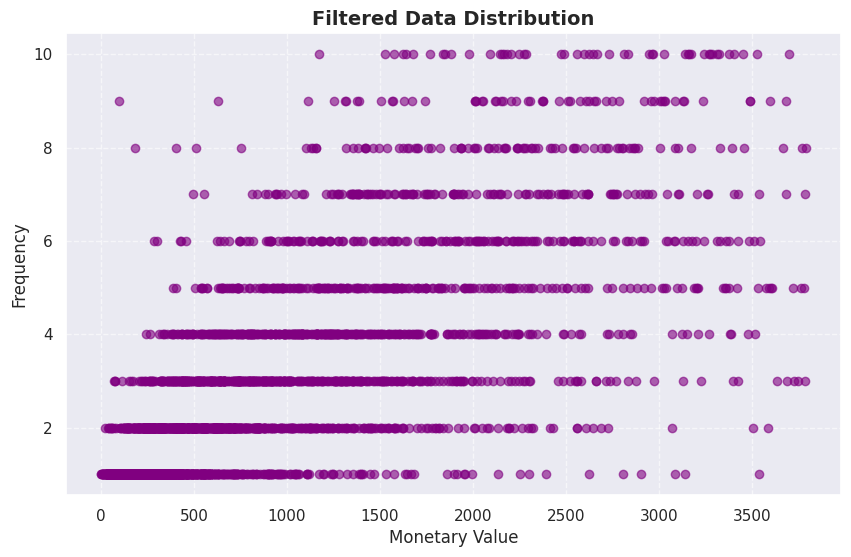

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot using Matplotlib
plt.figure(figsize=(10, 6))
plt.scatter(final_df['Monetary_value'], final_df['Frequency'], color='purple', alpha=0.6)
plt.title('Filtered Data Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Monetary Value', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [ ]:
data = sc.fit_transform(final_df)
data

array([[-0.87339886, -0.3771414 ],
       [ 0.55399178, -0.3771414 ],
       [-0.80932486, -0.84043061],
       ...,
       [-0.6165586 , -0.84043061],
       [ 0.4588827 , -0.3771414 ],
       [ 1.75678943,  0.54943702]])

# **🔹 K-Means Clustering**

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
WCSS = []
sil_s = []
for i in range (2,12):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
    labels = kmeans.fit_predict(data)
    WCSS.append(kmeans.inertia_)
    sil_s.append(silhouette_score(data,labels))

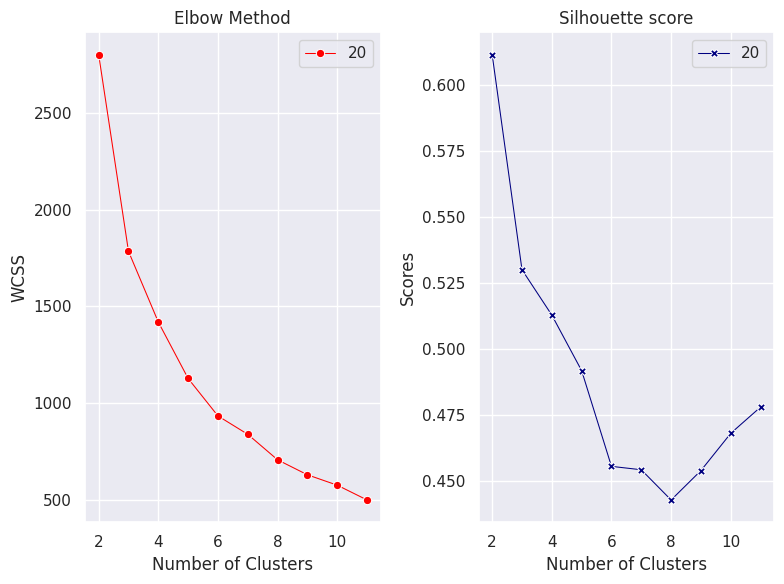

In [ ]:
plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
sns.lineplot(x=range(2,12),y=WCSS,marker='o',color='red',size=20)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

plt.subplot(1,2,2)
sns.lineplot(x=range(2,12),y=sil_s,marker='X',color='navy',size=20)
plt.title('Silhouette score')
plt.xlabel('Number of Clusters')
plt.ylabel('Scores')

plt.tight_layout()
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=4,init='k-means++',random_state=42)
labels = kmeans.fit_predict(data)

In [ ]:
kmeans.cluster_centers_

array([[-0.64437372, -0.65502849],
       [ 1.68236625,  2.45407044],
       [ 0.21620101,  0.39998889],
       [ 1.89610984,  0.74606558]])

In [ ]:
final_df['Clusters_KMeans'] = labels
final_df.head()

,Monetary_value,Frequency,Clusters_KMeans
Customer ID,,,
12346.0,169.36,2,0
12347.0,1323.32,2,2
12348.0,221.16,1,0
12349.0,2221.14,2,3
12351.0,300.93,1,0


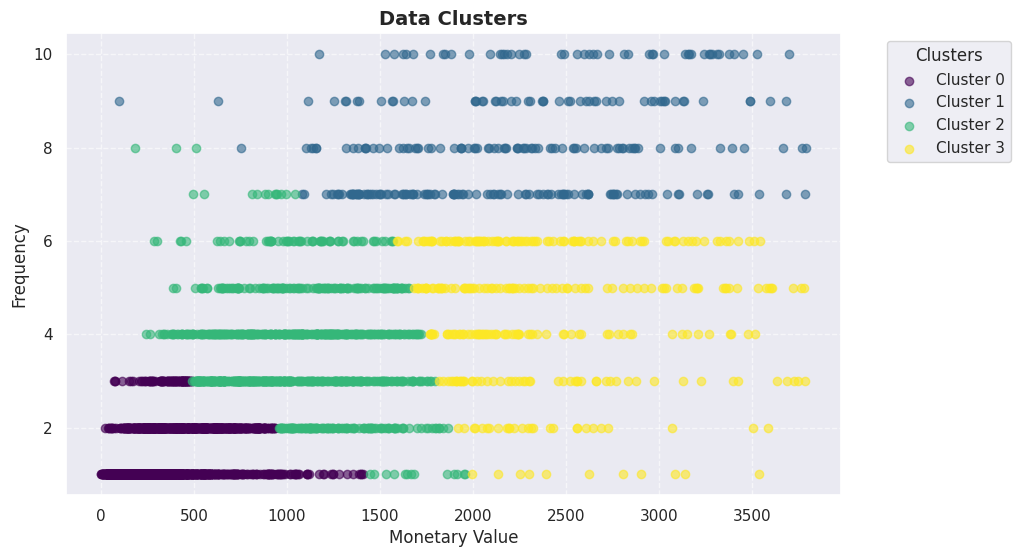

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'labels' is the array or series containing the cluster labels
# Get unique labels for coloring
unique_labels = np.unique(labels)

# Define a color map
colors = plt.cm.get_cmap('viridis', len(unique_labels))  # You can choose any colormap

# Scatter plot using Matplotlib
plt.figure(figsize=(10, 6))

# Plot each label with a different color
for i, label in enumerate(unique_labels):
    plt.scatter(final_df['Monetary_value'][labels == label],
                final_df['Frequency'][labels == label],
                color=colors(i), label=f'Cluster {label}', alpha=0.6)

plt.title('Data Clusters', fontsize=14, fontweight='bold')
plt.xlabel('Monetary Value', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title="Clusters", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


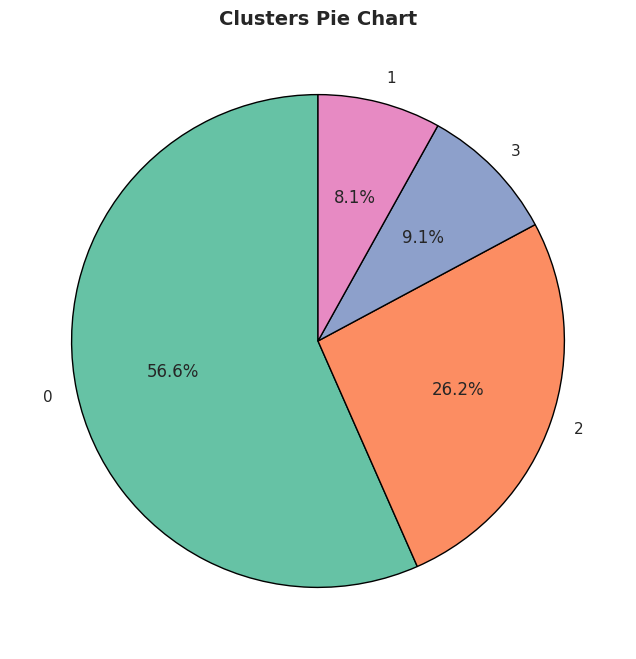

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the counts of each cluster
cluster_counts = final_df['Clusters_KMeans'].value_counts()

# Define a color palette (you can choose other palettes)
palette = sns.color_palette("Set2", len(cluster_counts))

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', startangle=90,
        colors=palette, wedgeprops={'edgecolor': 'black'})

# Title of the pie chart
plt.title('Clusters Pie Chart', fontsize=14, fontweight='bold')

# Show the pie chart
plt.show()


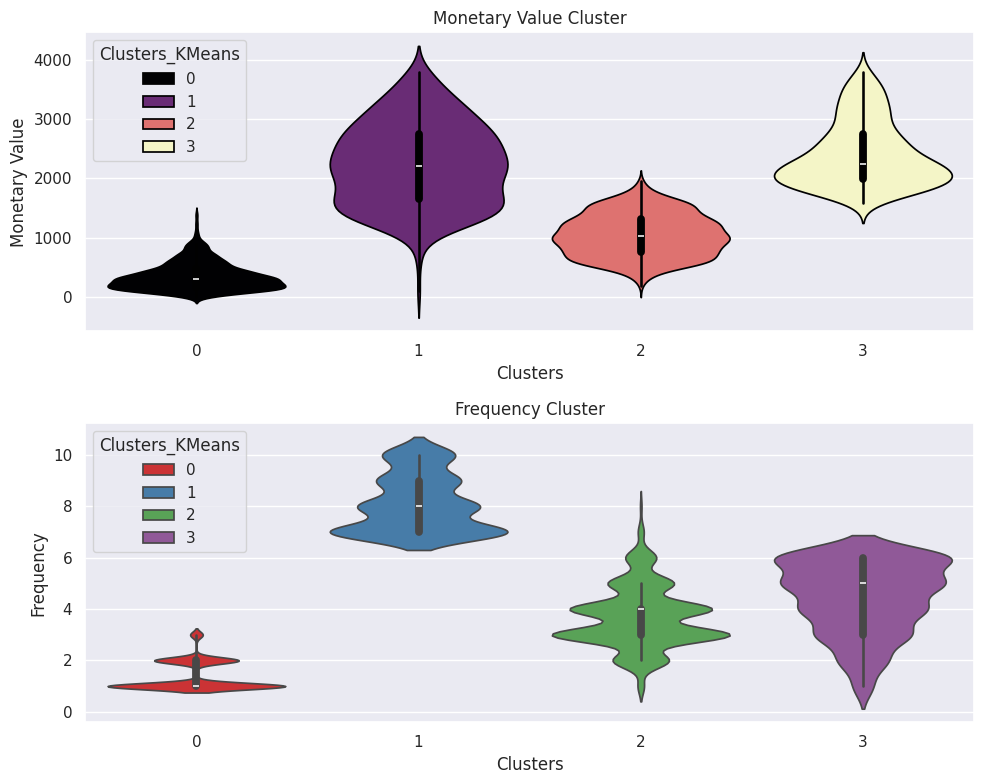

In [ ]:
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
sns.violinplot(data = final_df,x='Clusters_KMeans',y='Monetary_value',palette='magma',hue='Clusters_KMeans')
plt.title('Monetary Value Cluster')
plt.xlabel('Clusters')
plt.ylabel('Monetary Value')

plt.subplot(2,1,2)
sns.violinplot(data = final_df,x='Clusters_KMeans',y='Frequency',palette='Set1',hue='Clusters_KMeans')
plt.title('Frequency Cluster')
plt.xlabel('Clusters')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
cluster_labels = {
    0: "Low-Value Infrequent",
    1: "High-Value Regular",
    2: "Average Customer",
    3: "Loyal High-Spender"
}
final_df['KMeans Labels'] = final_df['Clusters_KMeans'].map(cluster_labels)
final_df.head()

,Monetary_value,Frequency,Clusters_KMeans,KMeans Labels
Customer ID,,,,
12346.0,169.36,2,0,Low-Value Infrequent
12347.0,1323.32,2,2,Average Customer
12348.0,221.16,1,0,Low-Value Infrequent
12349.0,2221.14,2,3,Loyal High-Spender
12351.0,300.93,1,0,Low-Value Infrequent


# **🔹 DBSCAN: Density-Based Clustering**
DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is an unsupervised clustering algorithm that groups dense regions of data while identifying outliers (noise).

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
dbscan = DBSCAN(eps=0.21387755102040817,min_samples=49).fit(data)

In [ ]:
dbscan.labels_

array([ 0,  0,  1, ...,  1,  0, -1])

In [ ]:
final_df['Clusters_DBSCAN'] = dbscan.labels_
final_df.head()

,Monetary_value,Frequency,Clusters_KMeans,KMeans Labels,Clusters_DBSCAN
Customer ID,,,,,
12346.0,169.36,2,0,Low-Value Infrequent,0
12347.0,1323.32,2,2,Average Customer,0
12348.0,221.16,1,0,Low-Value Infrequent,1
12349.0,2221.14,2,3,Loyal High-Spender,-1
12351.0,300.93,1,0,Low-Value Infrequent,1


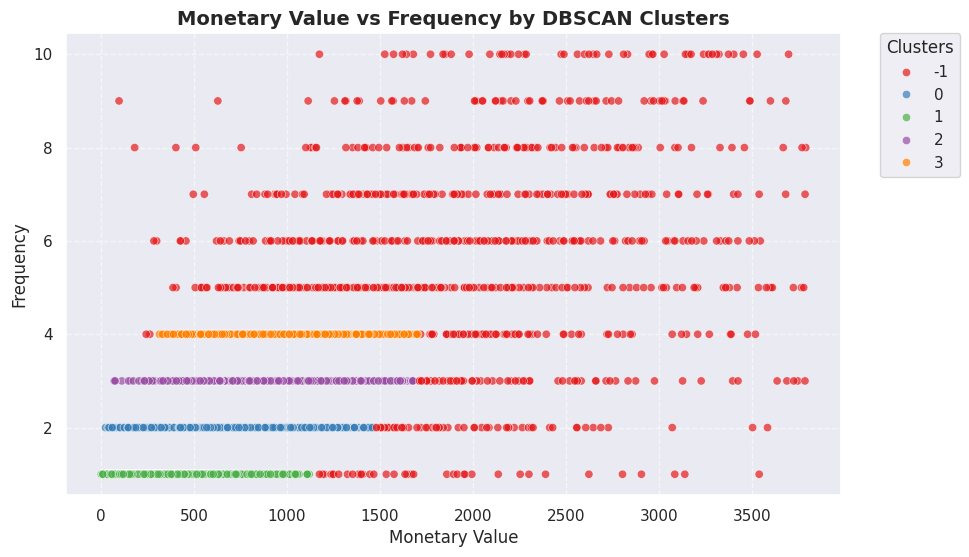

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure
plt.figure(figsize=(10, 6))

# Scatter plot with color based on 'Clusters_DBSCAN'
sns.scatterplot(data=final_df, x='Monetary_value', y='Frequency', hue='Clusters_DBSCAN', palette='Set1', alpha=0.7)

# Add title and labels
plt.title('Monetary Value vs Frequency by DBSCAN Clusters', fontsize=14, fontweight='bold')
plt.xlabel('Monetary Value', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Display the legend outside the plot
plt.legend(title='Clusters', loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)

# Show grid for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.show()


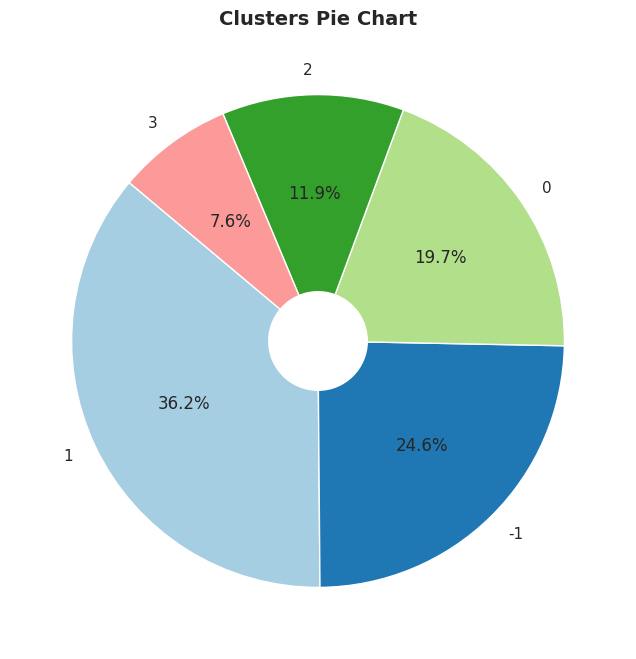

In [ ]:
import matplotlib.pyplot as plt

# Count the number of occurrences of each cluster (assuming 'Clusters_DBSCAN' is in final_df)
cluster_counts = final_df['Clusters_DBSCAN'].value_counts()

# Plot the pie chart (donut chart with a hole)
plt.figure(figsize=(8, 8))

# Create a donut chart by setting the 'wedgeprops' to create a hole
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.8), colors=plt.cm.Paired.colors)

# Add title
plt.title('Clusters Pie Chart', fontsize=14, fontweight='bold')

# Display the chart
plt.show()


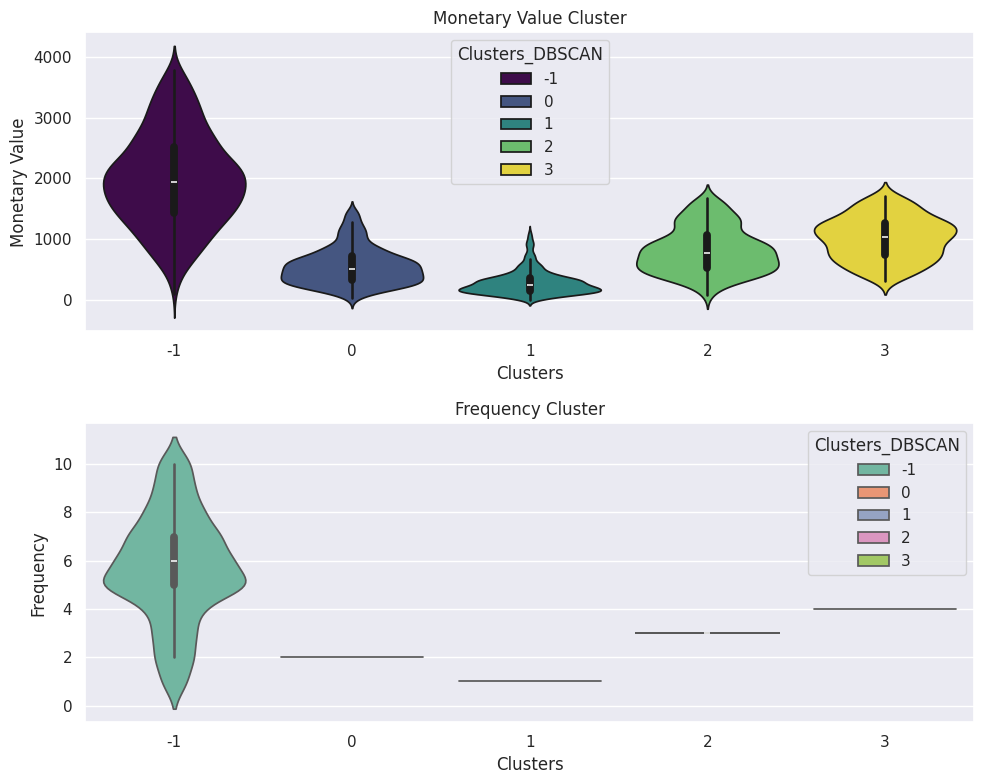

In [ ]:
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
sns.violinplot(data = final_df,x='Clusters_DBSCAN',y='Monetary_value',palette='viridis',hue='Clusters_DBSCAN')
plt.title('Monetary Value Cluster')
plt.xlabel('Clusters')
plt.ylabel('Monetary Value')

plt.subplot(2,1,2)
sns.violinplot(data = final_df,x='Clusters_DBSCAN',y='Frequency',palette='Set2',hue='Clusters_DBSCAN')
plt.title('Frequency Cluster')
plt.xlabel('Clusters')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
cluster_labels = {
    -1:"Irregular Buyers",
    0:"Low-Value Infrequent",
    1:"Very Low-Value Rare Buyers",
    2:"Moderate-Value Seasonal Shoppers",
    3:"Loyal High-Spender"
}
final_df['DBSCAN Labels'] = final_df['Clusters_DBSCAN'].map(cluster_labels)
final_df.head()

,Monetary_value,Frequency,Clusters_KMeans,KMeans Labels,Clusters_DBSCAN,DBSCAN Labels
Customer ID,,,,,,
12346.0,169.36,2,0,Low-Value Infrequent,0,Low-Value Infrequent
12347.0,1323.32,2,2,Average Customer,0,Low-Value Infrequent
12348.0,221.16,1,0,Low-Value Infrequent,1,Very Low-Value Rare Buyers
12349.0,2221.14,2,3,Loyal High-Spender,-1,Irregular Buyers
12351.0,300.93,1,0,Low-Value Infrequent,1,Very Low-Value Rare Buyers


# **Comparing Labels of the two cluster algorithms**

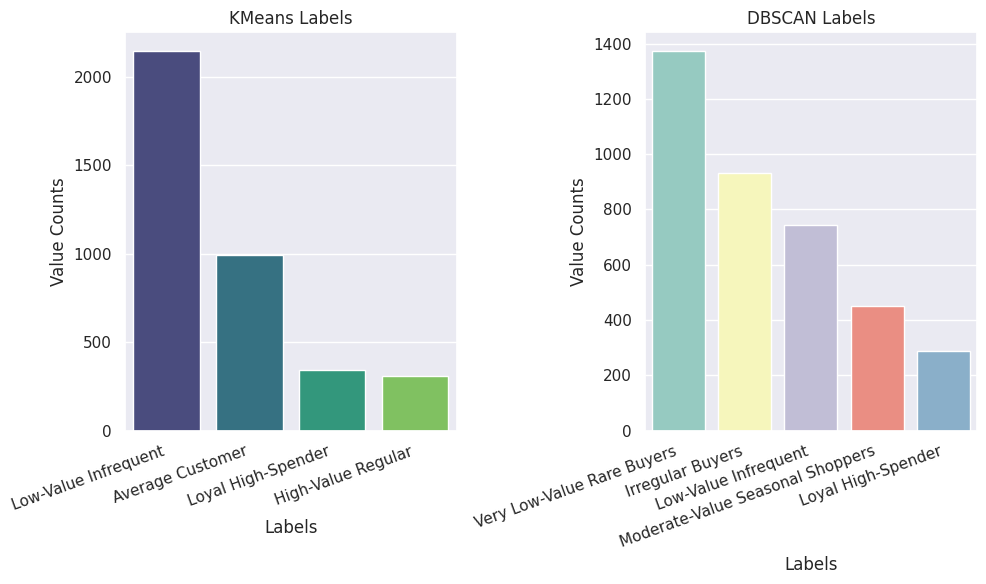

In [ ]:
K = final_df['KMeans Labels'].value_counts()
D = final_df['DBSCAN Labels'].value_counts()
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.barplot(x=K.index,y=K.values,palette='viridis')
plt.title('KMeans Labels')
plt.ylabel('Value Counts')
plt.xlabel('Labels')
plt.xticks(rotation=20, ha="right")
plt.subplot(1,2,2)
sns.barplot(x=D.index,y=D.values,palette='Set3')
plt.title('DBSCAN Labels')
plt.ylabel('Value Counts')
plt.xlabel('Labels')
plt.xticks(rotation=20, ha="right")
plt.tight_layout()
plt.show()